In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dict_df=pd.read_excel('Data_Dictionary.xlsx')
dict_df.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [3]:
loan_df=pd.read_csv('./loan/loan.csv')
loan_df.head()

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\4217034196.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv('./loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
for x in loan_df.columns:
    if 'high' in x.lower():
        print(x)
        

total_il_high_credit_limit


### check if there is some missing column /mismatch column wrt. data dictionary provided

In [5]:
set(loan_df.columns)-set(dict_df.LoanStatNew)

{'total_rev_hi_lim', 'verification_status_joint'}

In [6]:
set(dict_df.LoanStatNew)-set(loan_df.columns)

{'fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 nan,
 'total_rev_hi_lim \xa0',
 'verified_status_joint'}

###### seems like there is some Missing column and FICO values are also missing which could have been important parameter for this usecase.

In [7]:
any(loan_df.columns.isna()) #check if some hidden empty colummns are present

False

In [8]:
total_nulls=loan_df.isna().sum().sort_values()

In [9]:
col_with_less_na_count=total_nulls[:50]
col_with_less_na_count

id                             0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
delinq_2yrs                    0
total_pymnt                    0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
policy_code                    0
application_type               0
acc_now_delinq                 0
delinq_amnt                    0
total_pymnt_inv                0
dti                            0
total_rec_prncp                0
zip_code                       0
member_id                      0
loan_amnt                      0
addr_state                     0
funded_amnt_inv                0
term                           0
int_rate  

In [10]:
col_with_more_na_count=total_nulls[50:]
col_with_more_na_count.index

Index(['pub_rec_bankruptcies', 'emp_length', 'emp_title', 'desc',
       'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'num_bc_sats', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'mort_acc', 'num_bc_tl', 'num_tl_op_past_12m', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'mo_sin_rcnt_tl', 'num_il_tl', 'mo_sin_rcnt_rev_tl_op',
       'verification_status_joint', 'mo_sin_old_il_acct',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'total_bc_limit', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 

In [11]:
loan_df.avg_cur_bal.sum()

0.0

In [12]:
loan_df.shape

(39717, 111)

some of the column are all null and making it difficult to visualize other important column so storing such information wont be any helpful to us lets drop those

In [13]:
loan_df1=loan_df.dropna(how='all',axis=1)
loan_df1=loan_df1.dropna(how='all')

In [14]:
loan_df1.shape

(39717, 57)

Now lets see the null count for each column

In [15]:
loan_df1.isna().sum().sort_values()

id                                0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
policy_code                       0
open_acc                          0
pub_rec                           0
revol_bal                         0
addr_state                        0
last_pymnt_amnt                   0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
total_acc                         0
recoveries                        0
zip_code                          0
purpose                           0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                        

In [16]:
loan_df1[['next_pymnt_d','last_pymnt_d','loan_status']]

,next_pymnt_d,last_pymnt_d,loan_status
0,NaN,Jan-15,Fully Paid
1,NaN,Apr-13,Charged Off
2,NaN,Jun-14,Fully Paid
3,NaN,Jan-15,Fully Paid
4,Jun-16,May-16,Current
...,...,...,...
39712,NaN,Jul-10,Fully Paid
39713,NaN,Jul-10,Fully Paid
39714,NaN,Apr-08,Fully Paid
39715,NaN,Jan-08,Fully Paid


In [17]:
loan_df1.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

#### There are some columns with high number of null count so wecan get rid of those directly and some columns which doesnot serve any information for our insight like Member_id,id,next_pymnt_d, etc we can remove these columns too.Lets keep this task for later when we will do bivariate analysis where we will do different complex calculations. For now lets begin with the sanity checks

In [18]:
loan_df1.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

#### Doing some sanity check on the data 

In [19]:
loan_df1[(loan_df1.loan_status=='Fully Paid')&(~loan_df1.next_pymnt_d.isna())] #pass

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [20]:
loan_df1[(loan_df1.loan_status=='Current')&(loan_df1.next_pymnt_d.isna())] #pass

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [21]:
more_loandf=loan_df1[loan_df1.loan_amnt>loan_df1.funded_amnt]
# loan amount is more than funded amount is this valid ??? No i guess because 
# no body will give you more loan than what you asked for.
more_loandf

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
61,1068934,1277395,17500,8950,8925.000000,60 months,17.27%,223.74,D,D3,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
66,1069093,1303740,12500,8925,8925.000000,60 months,17.27%,223.11,D,D3,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
70,1069043,1303486,20975,13575,13550.000000,60 months,17.58%,341.63,D,D4,...,NaN,Apr-14,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
77,1068416,1302799,7250,7200,7175.000000,60 months,21.67%,197.51,F,F3,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
80,1068994,1303432,35000,22075,22050.000000,60 months,17.27%,551.84,D,D3,...,NaN,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39533,167645,163382,10000,6000,700.000000,36 months,8.70%,189.97,B,B1,...,NaN,Jul-15,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
39593,141774,141767,20000,4800,1949.999594,36 months,13.12%,162.01,D,D5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
39600,140036,140027,4000,1000,550.000000,36 months,9.96%,32.25,B,B5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0
39601,139980,139977,12000,5000,1399.996684,36 months,10.91%,163.49,C,C3,...,NaN,Aug-10,0.0,1,INDIVIDUAL,0,0.0,0,NaN,0.0


In [22]:
loan_df2=loan_df1[loan_df1.loan_amnt==loan_df1.funded_amnt]


In [23]:
loan_df2.isna().sum().sort_values()

id                                0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
policy_code                       0
open_acc                          0
pub_rec                           0
revol_bal                         0
addr_state                        0
last_pymnt_amnt                   0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
total_acc                         0
recoveries                        0
zip_code                          0
purpose                           0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                        

In [24]:
loan_df2.shape

(37868, 57)

In [25]:
loan_df2.describe() # trying for locating outliers quickly if possible

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.786800e+04,3.786800e+04,37868.000000,37868.000000,37868.000000,37868.000000,3.786800e+04,37868.000000,37868.000000,37868.000000,...,37868.000000,37868.000000,37868.000000,37812.0,37868.0,37868.0,37812.0,37868.0,37181.000000,37829.0
mean,6.857123e+05,8.535837e+05,10844.408207,10844.408207,10314.649806,323.689407,6.821043e+04,13.297135,0.147169,0.869256,...,92.806210,12.258594,2636.097482,0.0,1.0,0.0,0.0,0.0,0.043194,0.0
std,2.118310e+05,2.666375e+05,7229.445777,7229.445777,7147.258295,211.071815,6.121633e+04,6.679910,0.493944,1.069405,...,680.510246,149.088186,4413.129587,0.0,0.0,0.0,0.0,0.0,0.204089,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.136775e+05,6.631685e+05,5000.000000,5000.000000,5000.000000,164.850000,4.000000e+04,8.160000,0.000000,0.000000,...,0.000000,0.000000,216.117500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.710135e+05,8.575090e+05,9500.000000,9500.000000,8700.000000,278.085000,5.800000e+04,13.370000,0.000000,1.000000,...,0.000000,0.000000,541.080000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.412760e+05,1.051266e+06,15000.000000,15000.000000,14100.000000,429.860000,8.100000e+04,18.580000,0.000000,1.000000,...,0.000000,0.000000,3217.762500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [26]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37868 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37868 non-null  int64  
 1   member_id                   37868 non-null  int64  
 2   loan_amnt                   37868 non-null  int64  
 3   funded_amnt                 37868 non-null  int64  
 4   funded_amnt_inv             37868 non-null  float64
 5   term                        37868 non-null  object 
 6   int_rate                    37868 non-null  object 
 7   installment                 37868 non-null  float64
 8   grade                       37868 non-null  object 
 9   sub_grade                   37868 non-null  object 
 10  emp_title                   35518 non-null  object 
 11  emp_length                  36826 non-null  object 
 12  home_ownership              37868 non-null  object 
 13  annual_inc                  378

If we observe now, we can see that the data type for the various column doesnot seems to be aligned for eg 

> int-rate : should be float not object

> term,emp-lenght,zip_code: should be int not object 

> issue_d,last_pymnt_d,next_payment_d : should be datetime not object

In [27]:
loan_df2[loan_df2.sub_grade=='F5']['loan_status'].value_counts()

Fully Paid     55
Charged Off    51
Current         4
Name: loan_status, dtype: int64

In [28]:
loan_df2['term_in_months']=loan_df2.term.apply(lambda x: int(x.replace('months','')))
loan_df2.emp_length.value_counts()

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\2144684674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df2['term_in_months']=loan_df2.term.apply(lambda x: int(x.replace('months','')))


10+ years    8395
< 1 year     4378
2 years      4214
3 years      3898
4 years      3298
5 years      3139
1 year       3090
6 years      2111
7 years      1699
8 years      1399
9 years      1205
Name: emp_length, dtype: int64

For emp_length we will do this int transformation later 

In [29]:
loan_df2[['issue_d','last_pymnt_d','next_pymnt_d']]

,issue_d,last_pymnt_d,next_pymnt_d
0,Dec-11,Jan-15,NaN
1,Dec-11,Apr-13,NaN
2,Dec-11,Jun-14,NaN
3,Dec-11,Jan-15,NaN
4,Dec-11,May-16,Jun-16
...,...,...,...
39712,Jul-07,Jul-10,NaN
39713,Jul-07,Jul-10,NaN
39714,Jul-07,Apr-08,NaN
39715,Jul-07,Jan-08,NaN


In [30]:
loan_df2[['issue_d','last_pymnt_d','next_pymnt_d']]=loan_df2[['issue_d','last_pymnt_d','next_pymnt_d']].apply(pd.to_datetime,format='%b-%y',errors='coerce')

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\316134939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df2[['issue_d','last_pymnt_d','next_pymnt_d']]=loan_df2[['issue_d','last_pymnt_d','next_pymnt_d']].apply(pd.to_datetime,format='%b-%y',errors='coerce')


In [31]:
loan_df2['last_credit_pull_d']=pd.to_datetime(loan_df2.last_credit_pull_d,format='%b-%y')

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\267081221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df2['last_credit_pull_d']=pd.to_datetime(loan_df2.last_credit_pull_d,format='%b-%y')


In [32]:
loan_df2['int_rate']=loan_df2.int_rate.apply(lambda x: float(x[:-1]))

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\478714781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df2['int_rate']=loan_df2.int_rate.apply(lambda x: float(x[:-1]))


In [33]:
#check if there is some duplicate entries ffor thhe members
loan_df2.member_id.duplicated().sum()

0

In [34]:
loan_df2.pymnt_plan.value_counts()

n    37868
Name: pymnt_plan, dtype: int64

## Now lets do some analysis for the insight(Univariate and segmented)

1. distribution of the overall loan amount over different category
2. distribution of the different grades of the loan
3. Are there some relation ship between address and the loan-defaulting tendency
4. distribution of application type for the loan disbursed
5. What is the relation in loan application category wrt to his income or average balance
6. variation in the loan disbursed amount
7. variation in the loan tenure
8. Average collection of installments
9. variation in the interest rate for different category of loan i.e loan grades



### 6.variation in the loan disbursed amount

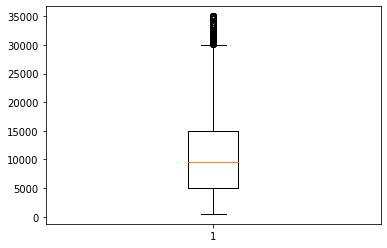

In [35]:
plt.boxplot(loan_df2.loan_amnt) ## we are only considering the value where funded=loan otherwise we had to use funded amount for this represenation
plt.show()

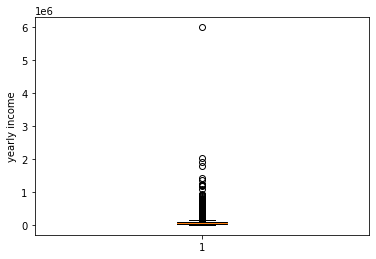

In [36]:
plt.boxplot(loan_df2.annual_inc) ## we are only considering the value where funded=loan 
# otherwise we had to use funded amount for this represenation
plt.ylabel('yearly income')
plt.show()

Some people are there with some extreme income mentioned, they  might skew the result, we will try to remove them from consideration before doing any analysis with the annual_income column

In [37]:
%matplotlib inline

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


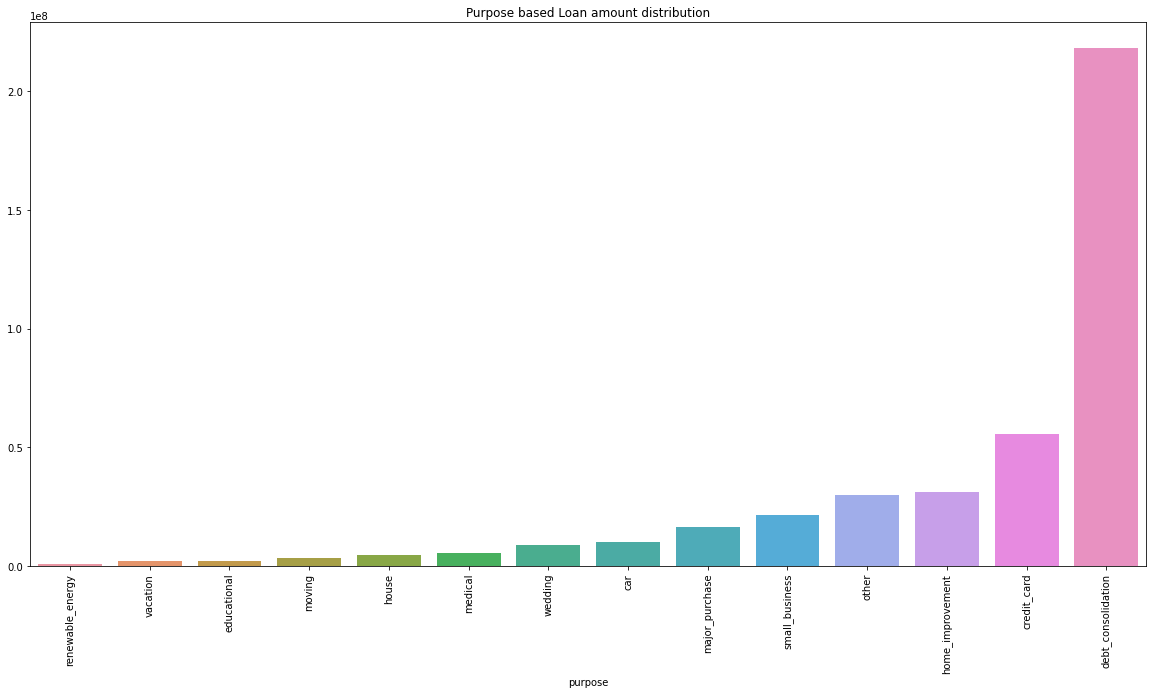

In [38]:
data=loan_df2.groupby(['purpose']).sum()['loan_amnt'].sort_values()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Purpose based Loan amount distribution")
sns.barplot(data.index,data.values)
plt.show()


More loan is issued for the purpose of debt consolidation by the memeber

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


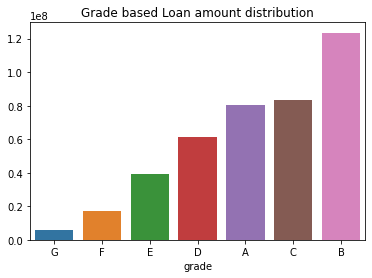

In [39]:
plt.title("Grade based Loan amount distribution")
gradedata=loan_df2.groupby(['grade']).sum()['loan_amnt'].sort_values()
sns.barplot(gradedata.index,gradedata.values)
plt.show()

More loan is issue under category B

#### 2. visualizing the distribution of different grades of loan

In [40]:
grade_dist_data=loan_df2.groupby(['grade','purpose']).sum()['loan_amnt']

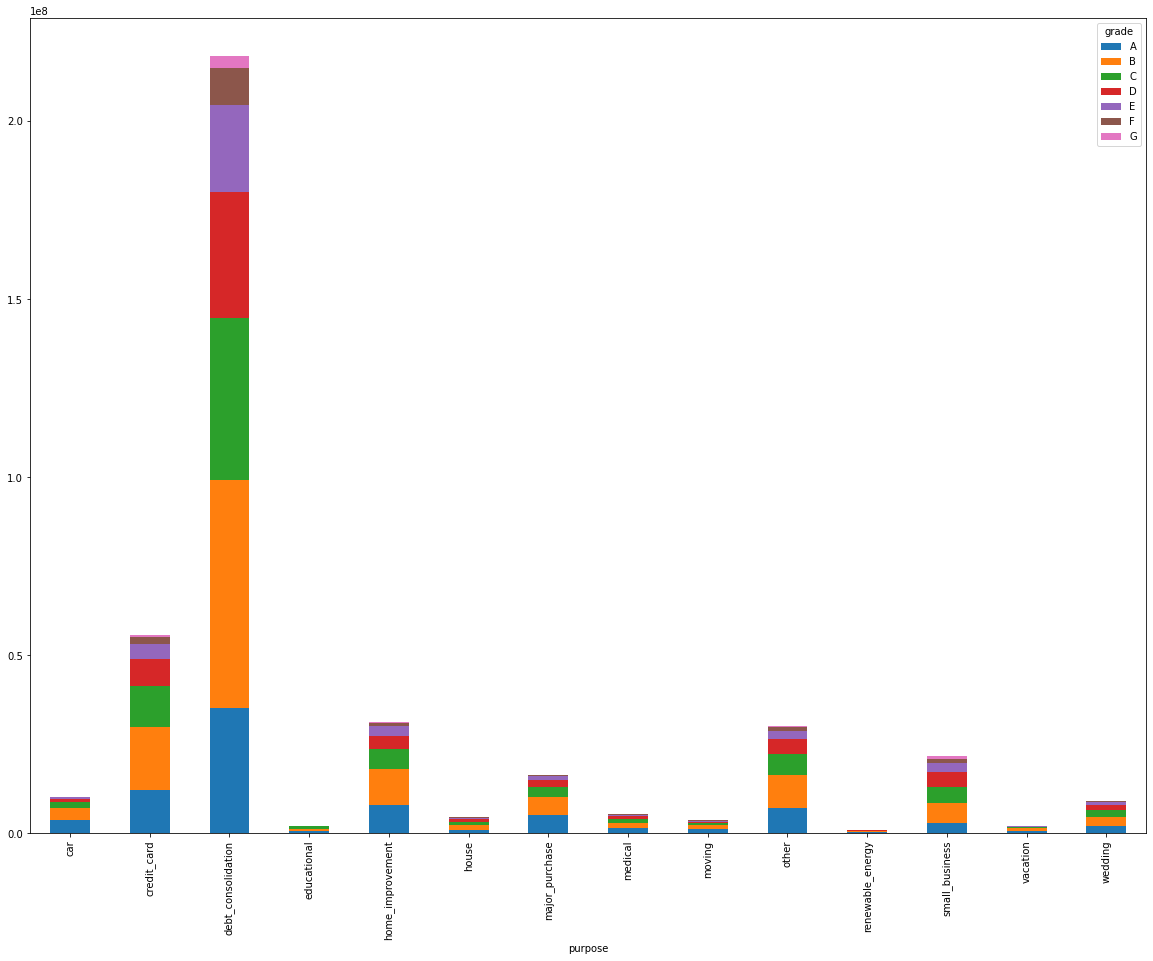

In [41]:
grade_dist_data.unstack(level=0).plot(kind='bar',stacked=True,figsize=(20,15))
plt.show()

this chart shows the combined information that debt consolidation is the main purpose for the loan and mostly grade B loan is issued in each category

### 3. Are there some relation ship between address and the loan-defaulting tendency

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


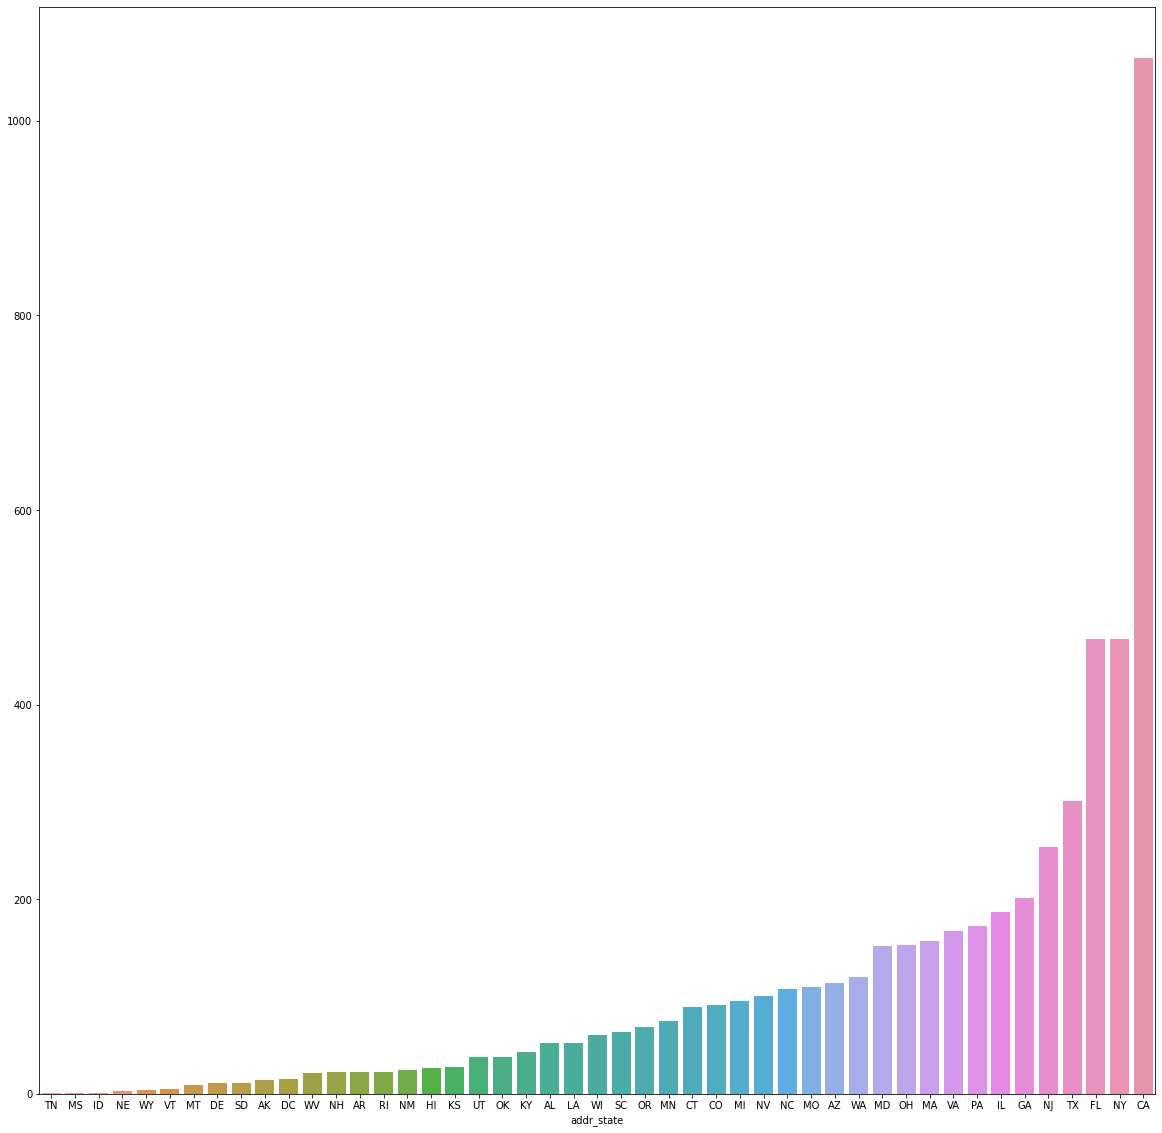

In [42]:
addr_wise_defaulting_data=loan_df2[loan_df2.loan_status=='Charged Off'].groupby('addr_state').count()['id'].sort_values()
plt.figure(figsize=(20,20))
sns.barplot(addr_wise_defaulting_data.index,addr_wise_defaulting_data.values)
plt.show()

##### This figure show that CA  state people has the highest defaulting tendency in the data however this can also be due to more application being processed for CA so for better analysis lets calculate the defaulting ration with respect to the overall applications

In [43]:
state_data=pd.concat([addr_wise_defaulting_data,loan_df2.addr_state.value_counts()],axis=1,names=['state'])

In [44]:
state_data.columns=['default count','total application']

In [45]:
percentage_data=(state_data['default count']/state_data['total application']*100).sort_values()

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


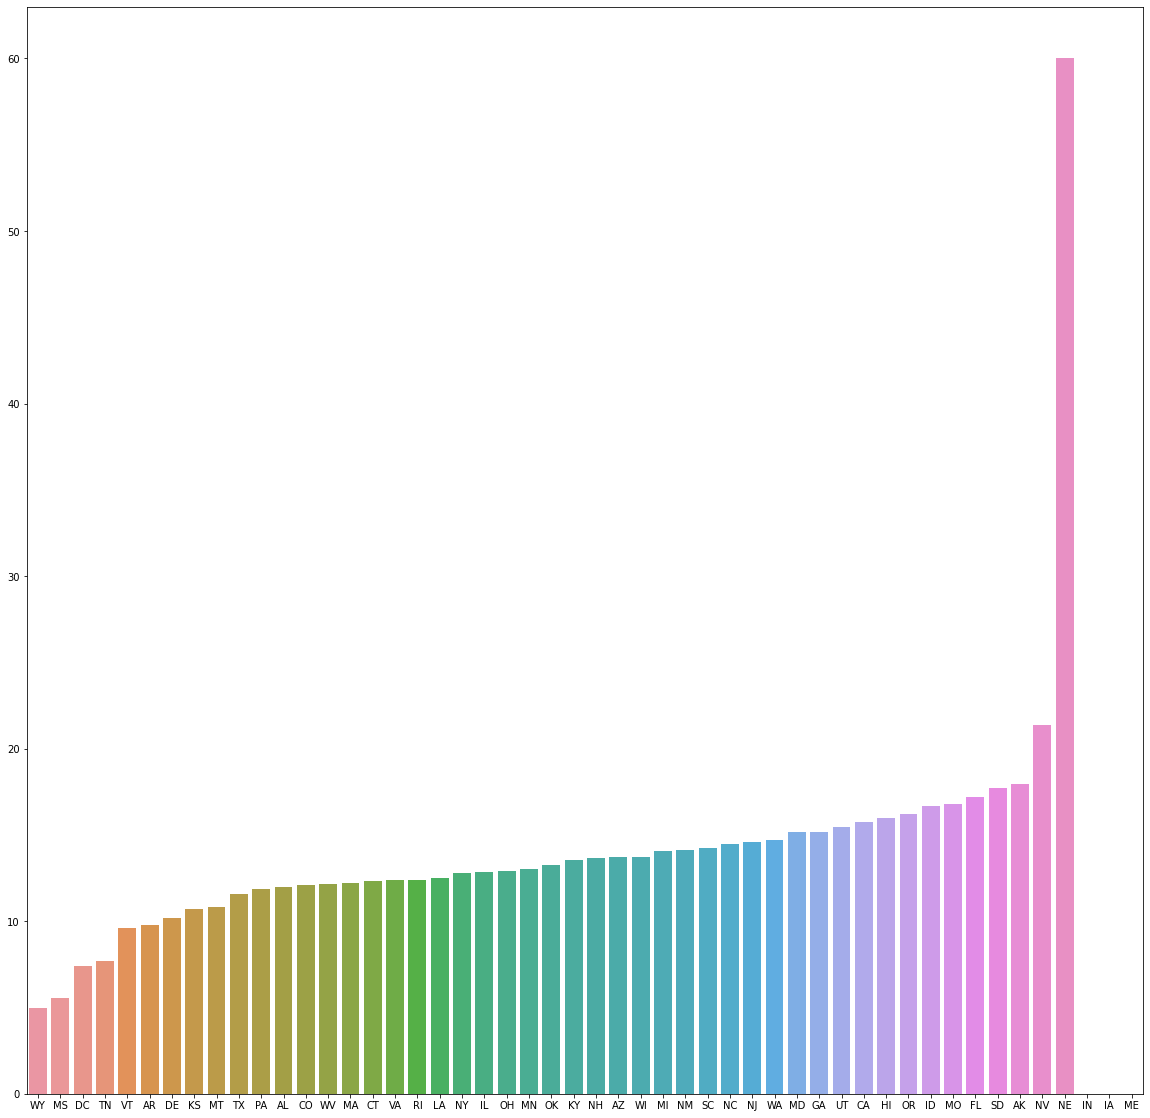

In [46]:
plt.figure(figsize=(20,20))
ax=sns.barplot(percentage_data.index,percentage_data.values)
plt.show()

##### our intution was right because of the more application it was showing more defaulting for the CA state. Now that we have analyse proportionately NE state has almost 60% of the total defaulting rate. so we need to be carefull giving loan to someone from this state. However we can still not be 100% because the application count itself for the NE was low as per the first graph. there is not enough data against NE to say this confidently



### 4. distribution of application type for the loan disbursed

In [47]:
loan_df2.application_type.value_counts()  #only one category so this column wont be much helpful for us 

INDIVIDUAL    37868
Name: application_type, dtype: int64

#### 5. What is the relation of loan application category wrt to his income or average balance

Since the average curr balance and annual join income is all N/A we will see with respect to the annual income only now 

In [48]:
category_loan_dist_maxinc=loan_df2.groupby('purpose').max()['annual_inc']
category_loan_dist_mininc=loan_df2.groupby('purpose').min()['annual_inc']

C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\194735149.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  category_loan_dist_maxinc=loan_df2.groupby('purpose').max()['annual_inc']
C:\Users\prason.ghimire\AppData\Local\Temp\ipykernel_21752\194735149.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  category_loan_dist_mininc=loan_df2.groupby('purpose').min()['annual_inc']


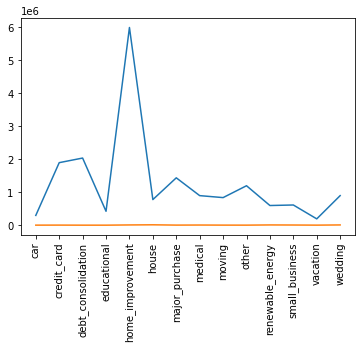

In [46]:
fig,ax = plt.subplots()
plt.xticks(rotation=90)
ax.plot(category_loan_dist_maxinc)
ax.plot(category_loan_dist_mininc)

<AxesSubplot:>

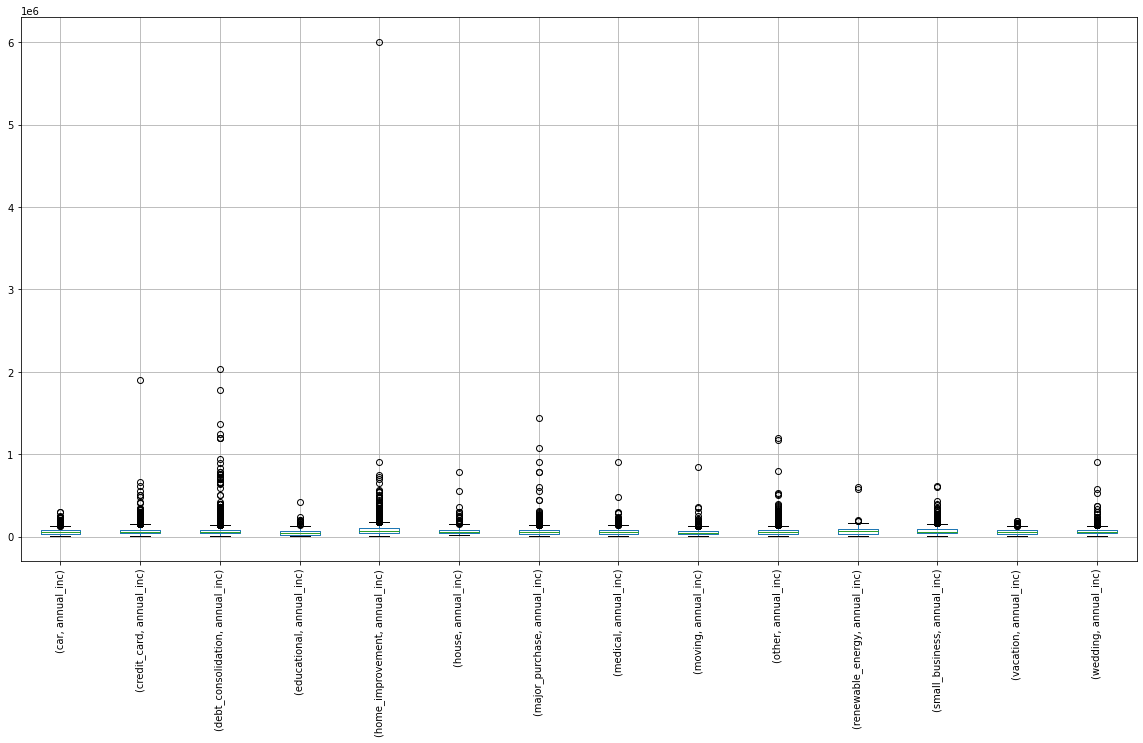

In [49]:
loan_df2[['purpose','annual_inc']].groupby('purpose').boxplot(subplots=False,figsize=(20,10),rot=90)

##### its difficult to visualize due to present of the extreme income values lets try to visualize variation without these extremes and find out what data says


<AxesSubplot:>

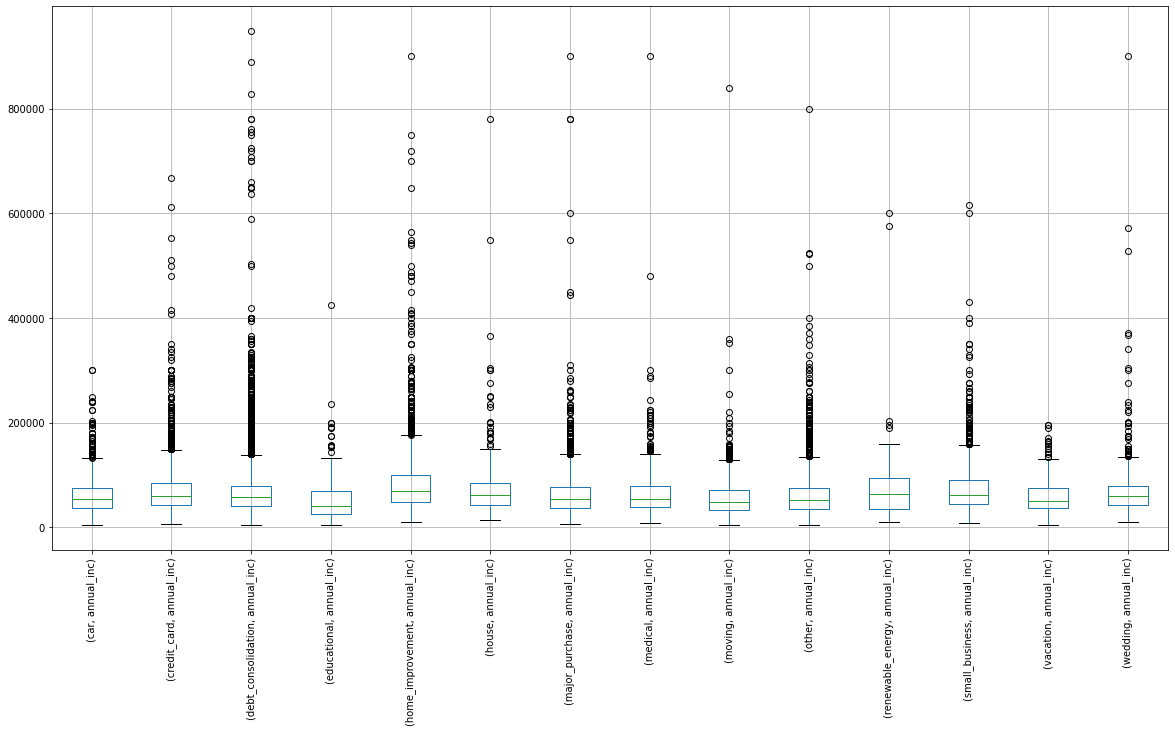

In [50]:
loan_df2[loan_df2['annual_inc']<1000000][['purpose','annual_inc']].groupby('purpose').boxplot(subplots=False,figsize=(20,10),rot=90)

the above variation shows that people who are applying for the educational, vacation and 4 wheeler loan has relatively less income compared to other. may be because they are more of typical middle class family whose dream fulfillment needs financial support. Let see if such lower income group who are spending for their luxorious  neeed like vacation , cars even though they have lesser income show the more defaulting behaviour if so we have to be aware before issuing them loan.

#### 9. variation in the interest rate for different category of loan i.e loan grades

<AxesSubplot:>

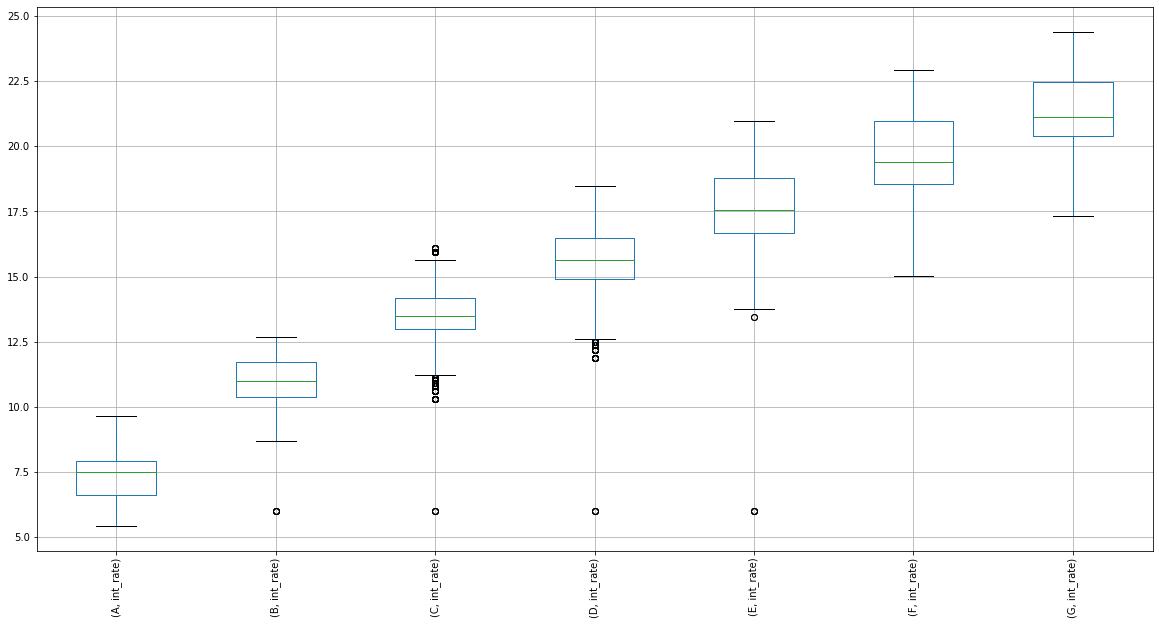

In [51]:
loan_df2[['grade','int_rate']].groupby('grade').boxplot(subplots=False,figsize=(20,10),rot=90)

This graph shows that the interest rate varies from 5 to 25 percentage however the higher grades loan are supposed to get the lower interest rate. may be higher grades loan are easy to trust by the banker that the borrower will return the amount timely(lower risk parameter)

In [52]:
loan_df2.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'term_in_months']

### So far we have analyse the one variable at a time as a whole or what it reveals in various segement . now lets move our focus on the relationship of the different important column showing different attributes with the loan defaulting tendency

# Some insight with respect to loan defaulting tendency(Bi-variate,Multivariate)

1. loan category having high defaulting tendency
2. interest rate with loan defaulting tendency
3. loan grade with defaulting tendency
4. emp. length with loan defaulting tendency
5. public backrupt declared application result in defaulting or not ( pub_rec & pub_rec_bankruptcies)
6. high loan amount and less tenure result in default or not
7. annual income with defaulting tendency
8. if higher open credit line has any relation with the defaualting rate.
9. dti ratio and defaulting tendency relation
10. verification status and defaulting tendency
11. term or loan with defaulting tendency (term_in_months)




Lets do some more data cleaning first by removing unnecessary column that we are still loading in memory

In [53]:
loan_df3=loan_df2.drop(columns=['id','emp_title','member_id','policy_code','application_type','pymnt_plan','collections_12_mths_ex_med','acc_now_delinq','tax_liens','delinq_amnt','term'],axis=1)

now lets remove all extra column except which we required in above 11 analysis 

In [54]:
loan_df4=loan_df3.drop(columns=['issue_d','desc','zip_code']) ## we have description column where we can analyse the phrase and group the intention of the consumer to estimate how likely he/she is to default loan based on the comment he she type or provide

In [55]:
import re
loan_df4['emp_length']=loan_df4.emp_length.replace('10+ years','10').replace('< 1 year','0').replace('11','10').fillna(-1)

In [56]:
loan_df4['emp_length']=loan_df4.emp_length.apply(lambda x: int(str(x)[:2]))

#here we just converted the object type to the int time so that it will be easier to derieve the insights.

In [57]:
loan_df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies,term_in_months
0,5000,5000,4975.0,10.65,162.87,B,B2,10,RENT,24000.0,...,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,0.0,36
1,2500,2500,2500.0,15.27,59.83,C,C4,0,RENT,30000.0,...,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,0.0,60
2,2400,2400,2400.0,15.96,84.33,C,C5,10,RENT,12252.0,...,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,0.0,36
3,10000,10000,10000.0,13.49,339.31,C,C1,10,RENT,49200.0,...,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,0.0,36
4,3000,3000,3000.0,12.69,67.79,B,B5,1,RENT,80000.0,...,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0,0.0,60


In [58]:
loan_df4.loan_status.value_counts()

Fully Paid     31513
Charged Off     5307
Current         1048
Name: loan_status, dtype: int64

#### 1. loan category having high defaulting tendency

In [59]:
defaulting_by_group=loan_df4[loan_df4.loan_status=='Charged Off'].groupby('purpose').count()['loan_amnt'].sort_values()

In [60]:
count_by_group = loan_df4.groupby('purpose').count()['funded_amnt'].sort_values()

In [61]:
defaulting_smry1=pd.concat([defaulting_by_group,count_by_group],axis=1)

In [62]:
data=(defaulting_smry1['loan_amnt']/defaulting_smry1['funded_amnt']*100).sort_values()

<BarContainer object of 14 artists>

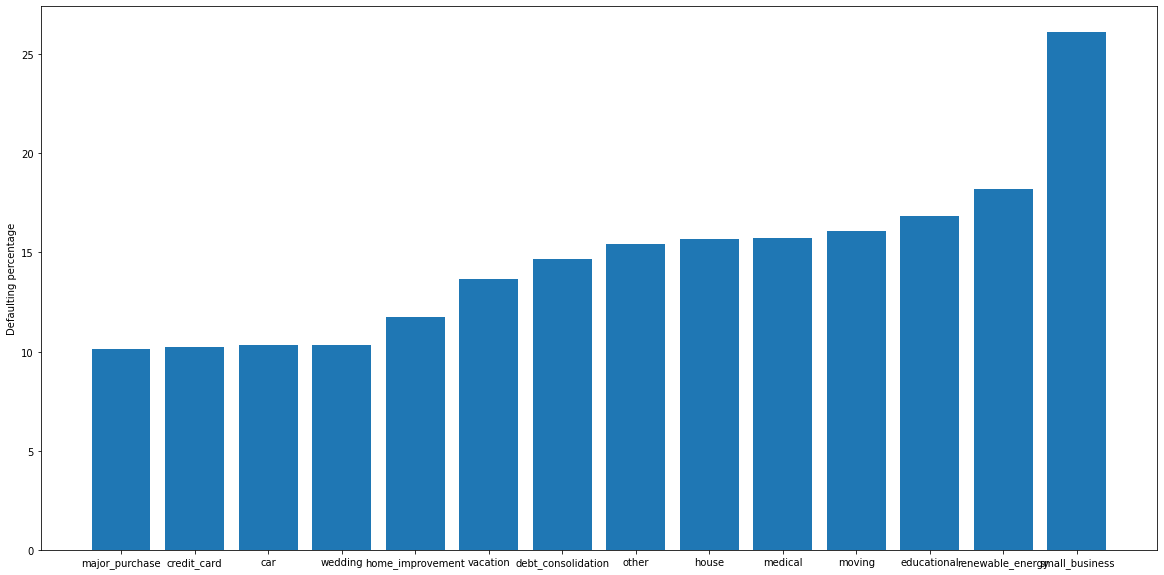

In [63]:
plt.figure(figsize=(20,10))
plt.ylabel('Defaulting percentage')
plt.bar(data.index,data.values)

##### this shows that person taking loan for the small business has around 25 percentage of defaulting which is highest may be because the intention of the business is unclear and still the loan is issued and when the business goes down the member are unable to pay the sum back

#### 2. interest rate with loan defaulting tendency

<AxesSubplot:>

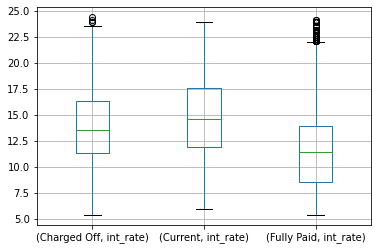

In [64]:
loan_df4[['int_rate','loan_status']].groupby('loan_status').boxplot(subplots=False)

NO noticiable patttern seen in the defaulting tendency with the interest rate charged

### 3. loan grade with defaulting tendency

In [65]:
loan_df4[['sub_grade','loan_status']][loan_df4.loan_status=='Charged Off'].groupby('sub_grade').count()

,loan_status
sub_grade,
A1,29
A2,74
A3,101
A4,166
A5,209
B1,164
B2,222
B3,323
B4,297


<AxesSubplot:xlabel='grade'>

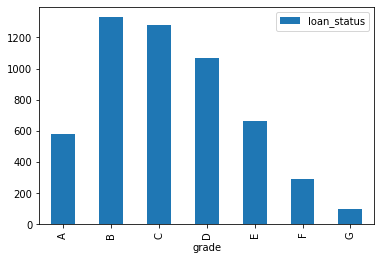

In [66]:
loan_df4[['grade','loan_status']][loan_df4.loan_status=='Charged Off'].groupby('grade').count().plot.bar()

#### 4. emp. length with loan defaulting tendency

<AxesSubplot:xlabel='emp_length', ylabel='defaulted count'>

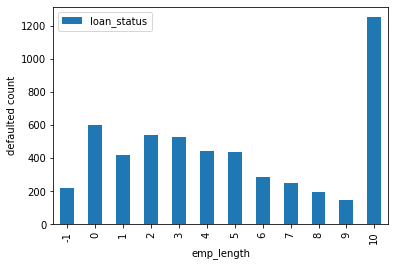

In [67]:
loan_df4[['emp_length','loan_status']][loan_df4.loan_status=='Charged Off'].groupby('emp_length').count().plot.bar(ylabel="defaulted count")

### 5. public backrupt declared application result in defaulting or not ( pub_rec & pub_rec_bankruptcies)

In [68]:
loan_df4.pub_rec.value_counts()

0    35844
1     1966
2       49
3        7
4        2
Name: pub_rec, dtype: int64

In [69]:
loan_df4[loan_df4.loan_status=='Charged Off'].groupby('pub_rec').count()['loan_status']

pub_rec
0    4875
1     422
2      10
Name: loan_status, dtype: int64

In [70]:
loan_df4.pub_rec_bankruptcies.value_counts()

0.0    35581
1.0     1594
2.0        6
Name: pub_rec_bankruptcies, dtype: int64

In [71]:
loan_df4[loan_df4.loan_status=='Charged Off'].groupby('pub_rec_bankruptcies').count()['loan_status']

pub_rec_bankruptcies
0.0    4853
1.0     337
2.0       2
Name: loan_status, dtype: int64

In [72]:
overall_count=loan_df4.groupby('term_in_months').count()['loan_status']
overall_count

term_in_months
36    28350
60     9518
Name: loan_status, dtype: int64

In [73]:
default_count=loan_df4[loan_df4.loan_status=='Charged Off'].groupby('term_in_months').count()['int_rate']
default_count

term_in_months
36    3144
60    2163
Name: int_rate, dtype: int64

we can seethat the long tenure has proportionately high change of being defaulting 

In [74]:
smry_df2=pd.concat([overall_count,default_count],axis=1)
smry_df2.columns=['total_application','defaulted_application']

In [75]:
smry_df2

,total_application,defaulted_application
term_in_months,,
36,28350,3144
60,9518,2163


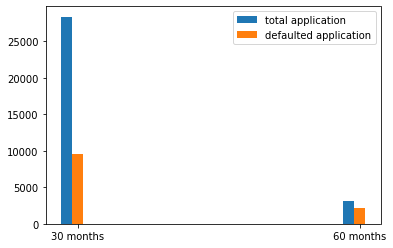

In [76]:
plt.bar(smry_df2.index-.95,smry_df2.iloc[0,:],width=.95,label='total application')
plt.bar(smry_df2.index,smry_df2.iloc[1,:],width=.95,label='defaulted application')
plt.xticks(smry_df2.index,['30 months','60 months'])
plt.legend()

this show most of the loan taken for the 60 month tenure is defaulted, so we should be careful while investing in the long term loan.

In [77]:
# loan_df4[loan_df4.loan_status=='Charged Off']
loan_df4[loan_df4.term_in_months==60].int_rate.value_counts()

13.49    327
11.49    266
16.77    191
18.25    184
11.99    183
        ... 
22.94      1
20.20      1
19.39      1
16.29      1
24.40      1
Name: int_rate, Length: 176, dtype: int64

In [78]:
temp1=(loan_df4[(loan_df4.term_in_months==60) &(loan_df4.loan_status=='Charged Off')].int_rate.value_counts()/loan_df4[loan_df4.term_in_months==60].int_rate.value_counts())>0.5

In [79]:
temp1[temp1==True]

16.11    True
16.29    True
20.20    True
20.90    True
21.74    True
23.13    True
24.40    True
Name: int_rate, dtype: bool

this data shows that if we are charging higher interest rate and the tenure is high there is more than 50% chance of being defaulting

### 7. annual income with defaulting tendency

(array([3.7821e+04, 4.0000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.0000e+03, 6.0360e+05, 1.2032e+06, 1.8028e+06, 2.4024e+06,
        3.0020e+06, 3.6016e+06, 4.2012e+06, 4.8008e+06, 5.4004e+06,
        6.0000e+06]),
 <BarContainer object of 10 artists>)

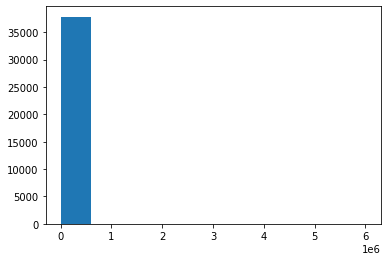

In [80]:
plt.hist(loan_df4.annual_inc.values)

this is giving some skewed result may be due to some extreme values lets try to make it normal

In [81]:
loan_df4.annual_inc.describe()

count    3.786800e+04
mean     6.821043e+04
std      6.121633e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      8.100000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [83]:
processing_df=loan_df4[loan_df4.annual_inc<=200000] # 75 percent of data is less that 81000 and max is 6000000 , lets try to elemenate those extreme values


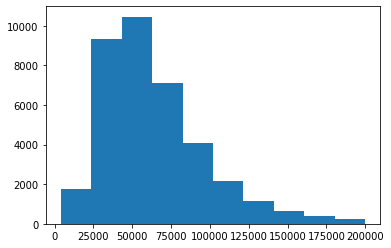

In [84]:
a,b,c=plt.hist(processing_df.annual_inc)

In [85]:
grouped_subset=processing_df[['annual_inc','loan_status','int_rate']].groupby([pd.cut(processing_df.annual_inc,10),'loan_status'])

In [86]:
result=grouped_subset.size().unstack()

In [87]:
label_x=list(map(lambda x : x.right,result.index.tolist()))

In [88]:
result['Charged Off'].values

array([ 351, 1579, 1500,  903,  466,  197,  124,   74,   30,   28],
      dtype=int64)

In [89]:
label_x

[23600.0,
 43200.0,
 62800.0,
 82400.0,
 102000.0,
 121600.0,
 141200.0,
 160800.0,
 180400.0,
 200000.0]

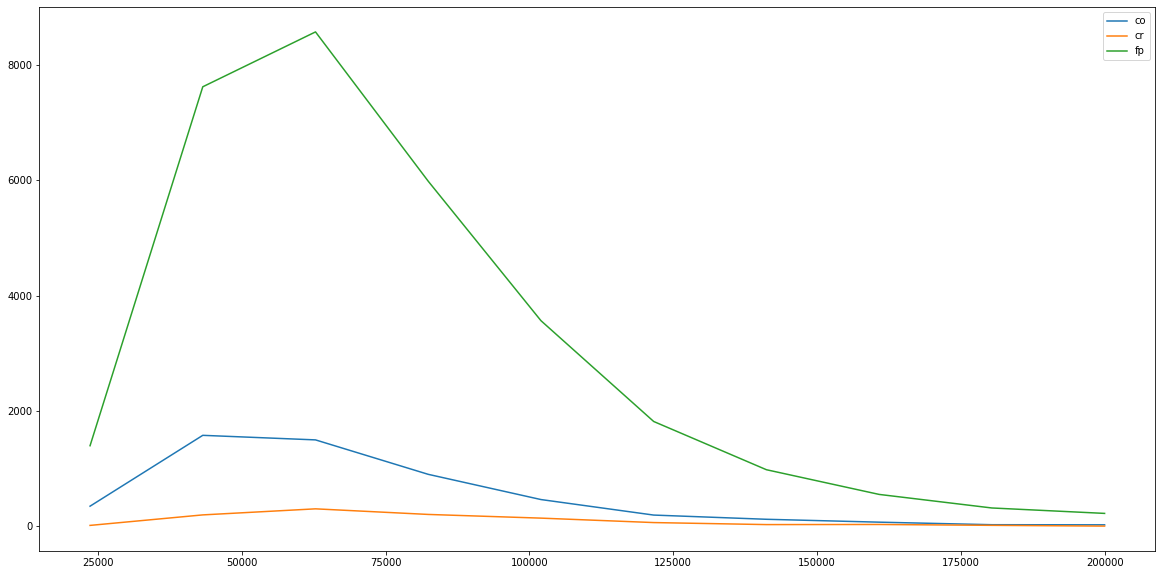

In [90]:
plt.figure(figsize=(20,10))
plt.plot(label_x,result['Charged Off'],label='co')
plt.plot(label_x,result['Current'],label='cr')
plt.plot(label_x,result['Fully Paid'],label='fp')
plt.legend()

thi sshows that lower income group have more defaulting tendency however the non defaulting is even more higher so annual income is not something that we shouldgive more focus while deciding on the possible defaulting candidate

### 8. if higher open credit line has any relation with the defaualting rate.

In [91]:
all_data=loan_df4.open_acc.value_counts().sort_index()

In [92]:
default_data=loan_df4[(loan_df4.loan_status=='Charged Off')].open_acc.value_counts().sort_index()

In [93]:
cl_df=pd.concat([all_data,default_data],axis=1)

In [94]:
cl_df.columns=['total application','defaulted application']

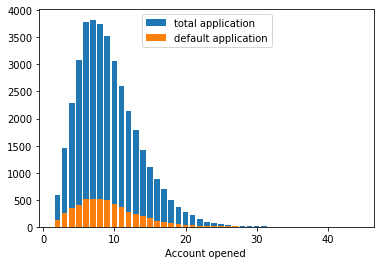

In [95]:
fig,ax=plt.subplots()
ax.bar(cl_df.index,cl_df.iloc[:,0],label='total application')
ax.bar(cl_df.index,cl_df.iloc[:,1],label='default application')
plt.xlabel('Account opened ')
plt.legend()

MOre credit line has not much impact  on the defaulting tendency

### 9. dti ratio and defaulting tendency relation

In [96]:
dti_all=loan_df4.groupby([pd.cut(loan_df4.dti,bins=10)]).size()

In [97]:
dti_defaulted=loan_df4[loan_df4.loan_status=='Charged Off'].groupby([pd.cut(loan_df4.dti,bins=10)]).size()

In [98]:
result_dtidf=pd.concat([dti_all,dti_defaulted],axis=1)

<BarContainer object of 10 artists>

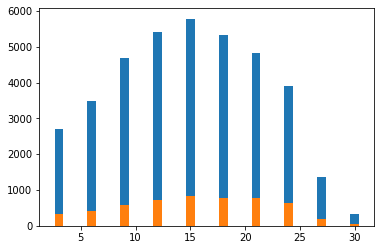

In [99]:
fig,ax1=plt.subplots()
xlabels=list(map(lambda x : x.right,result_dtidf.index.tolist()))
ax1.bar(xlabels,result_dtidf.iloc[:,0])
ax1.bar(xlabels,result_dtidf.iloc[:,1])


### 10. verification status and defaulting tendency

In [100]:
verifiication_df=loan_df4.groupby(['verification_status','loan_status']).size()

In [101]:
verifiication_df

verification_status  loan_status
Not Verified         Charged Off     2063
                     Current          219
                     Fully Paid     14130
Source Verified      Charged Off     1365
                     Current          287
                     Fully Paid      7930
Verified             Charged Off     1879
                     Current          542
                     Fully Paid      9453
dtype: int64

this show that if the source of the candiddate is verified then the tendency of defaulting will be less  compared to the non-verified and only income verified


In [102]:
ownershipdf=loan_df4.groupby(['home_ownership','loan_status']).size().unstack()
ownershipdf

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2145.0,577.0,13905.0
NONE,NaN,NaN,3.0
OTHER,15.0,NaN,73.0
OWN,424.0,81.0,2441.0
RENT,2723.0,390.0,15091.0


In [104]:
x=np.arange(len(ownershipdf.index))

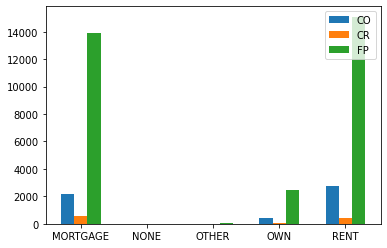

In [105]:
plt.bar(x-.2,ownershipdf['Charged Off'],width=.2,label='CO')
plt.bar(x,ownershipdf['Current'],width=.2,label='CR')
plt.bar(x+.2,ownershipdf['Fully Paid'],width=.2,label='FP')
plt.xticks(x,ownershipdf.index)
plt.legend()

This show that the pople with mortgage and rented house has relatively higher changes of being default in loan

In [106]:
revol_baldefault=loan_df4.groupby([pd.cut(loan_df4.revol_bal,bins=10),'loan_status']).size().unstack()

This shows with the lower balance mainted < 30k ..the chance of being defaulting is higher


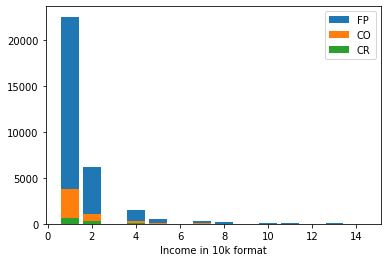

In [107]:
fig,ax2=plt.subplots()
# plt.rcdefaults()
xlabels=np.array(list(map(lambda x : round(x.right),revol_baldefault.index.tolist())))
ax2.bar(xlabels//10000,revol_baldefault.iloc[:,2],label='FP')
ax2.bar(xlabels//10000,revol_baldefault.iloc[:,0].values,label='CO')
ax2.bar(xlabels//10000,revol_baldefault.iloc[:,1],label='CR')
# plt.xticks(xlabels,[1,2,3,4,5,6,7,8,9,0])
plt.xlabel('Income in 10k format')
plt.legend()
plt.show()

With the lower income the noticiable chargeoff proportion can be seen which means that if the user is maintaining lower revolving balance then he is likely to be defauting loan amount 

In [108]:
revol_baldefault

loan_status,Charged Off,Current,Fully Paid
revol_bal,,,
"(-149.588, 14958.8]",3736,614,22549
"(14958.8, 29917.6]",1084,303,6131
"(29917.6, 44876.4]",290,75,1552
"(44876.4, 59835.2]",113,32,569
"(59835.2, 74794.0]",35,16,289
"(74794.0, 89752.8]",21,1,171
"(89752.8, 104711.6]",16,2,104
"(104711.6, 119670.4]",7,3,69
"(119670.4, 134629.2]",1,1,53


In [109]:
loan_df4.groupby(['purpose','loan_status']).size().unstack()

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,157.0,50.0,1311.0
credit_card,499.0,94.0,4289.0
debt_consolidation,2600.0,534.0,14561.0
educational,53.0,NaN,262.0
home_improvement,331.0,94.0,2394.0
house,57.0,13.0,293.0
major_purchase,213.0,32.0,1857.0
medical,106.0,10.0,558.0
moving,91.0,7.0,468.0
